In [1]:
import numpy as np
import gym
import random
import time

from IPython.display import clear_output

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [3]:
import gym
import time
import numpy as np
from IPython.display import clear_output  


if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_


env = gym.make("FrozenLake-v1",is_slippery=False)  
state = env.reset()

done = False

while not done:
    env.render()  
  
    action = 1
    
    state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated  
    
    time.sleep(2)
    clear_output(wait=True)
    print("Action:", action, "Reward:", reward, "Done:", done)

env.close()

print("Action space:", env.action_space)  
# meka down yanna kiwata ynne eka eka eka pathiwala down slepeery kiyal kiyanne


Action: 1 Reward: 0.0 Done: True
Action space: Discrete(4)


In [5]:
q_table=np.zeros((16,4))
print(q_table)

# me tabel eke api agayan store karanwa e agayan walta thami passe me algorithum eka disision ganne


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [7]:
num_episodes=10000
max_steps_per_episode=100

learning_rate=0.1
discount_rate=0.99

exploration_rate=1
max_exploration_rate=1
min_exploration_rate=0.01
exploration_decay_rate=0.001

In [9]:
random.uniform(0,1)

0.6805706460543727

In [11]:
all_rewards = []

for episode in range(num_episodes):

    state, info = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):

        exploration_rate_threshold = random.uniform(0, 1)
     

        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()
       

    
        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

      
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

     
        state = new_state
        rewards_current_episode += reward

        if done:
            break

    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

    all_rewards.append(rewards_current_episode)


In [13]:
print(len(all_rewards),all_rewards)

10000 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [15]:
all_rewards=np.array(all_rewards)

all_rewards=all_rewards.reshape(10,1000)
reward_per_thousand_epochs=np.mean(all_rewards,axis=1)

print(reward_per_thousand_epochs)

[0.28  0.73  0.894 0.966 0.978 0.984 0.989 0.989 0.993 0.987]


Text(0, 0.5, 'Average Reward')

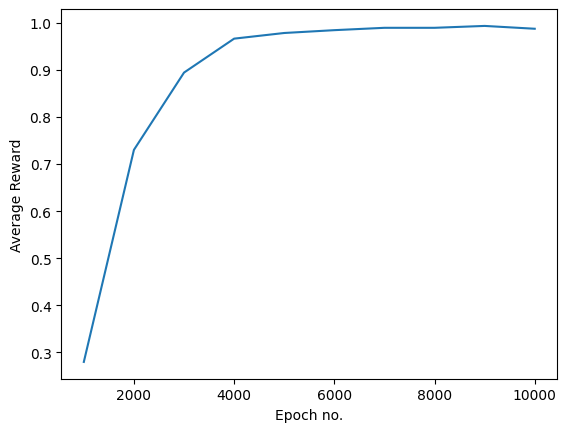

In [17]:
from matplotlib import pyplot as plt

epochs=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]

plt.plot(epochs,reward_per_thousand_epochs)
plt.xlabel('Epoch no.')
plt.ylabel('Average Reward')

In [19]:
print('=============Updated Q Table=============')
print(q_table)

=============Updated Q Table=============
[[0.94148015 0.95099005 0.93206535 0.94148015]
 [0.94148015 0.         0.58464952 0.86938473]
 [0.48862008 0.79026748 0.05703018 0.33280903]
 [0.21772628 0.         0.00924329 0.02092736]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.94169245 0.         0.31967933]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.98009999 0.        ]
 [0.94010449 0.99       0.         0.74205069]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.97029894]
 [0.98009999 0.98999994 1.         0.98009993]
 [0.         0.         0.         0.        ]]


In [21]:
import time
import numpy as np
import gym
from IPython.display import clear_output

env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human")

max_steps_per_episode = 100 

for episode in range(5):
    
    state, info = env.reset()
    state = int(state) 
    done = False

    print(f'================== EPISODE {episode + 1} ==================')
    time.sleep(1)

    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)

        action = np.argmax(q_table[state, :])

        new_state, reward, terminated, truncated, info = env.step(action)
        new_state = int(new_state)

        done = terminated or truncated

        if done:
            clear_output(wait=True)
            env.render()

            if reward == 1:
                print('********** Reached the Goal **********')
            else:
                print('********** Fell into a Hole **********')

            time.sleep(3)
            clear_output(wait=True)
            break

        state = new_state

env.close()


********** Reached the Goal **********
